In [1]:
pytorch_workflow = {1: "data (prepare and load)",
                    2: "build model",
                    3: "fitting the model to the data (training)",
                    4: "making prediction and vealuating a model (inference)",
                    5: "saving and loading a model",
                    6: "putting it all together"}
pytorch_workflow

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to the data (training)',
 4: 'making prediction and vealuating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt 

torch.__version__

'2.9.1+cu128'

## 1.0 Data (Preparing and Loading)

Data can be almost anything in Machine Learning:
1. Excel sheet
2. Images of any kind
3. Videos (Like on Youtube)
4. Audio (Like songs or podcasts)
5. DNA
6. Text

Machine Learning has majorly two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some known data using the linear regression formula.
we'll use a linear regression formula to make a straight line with known **parameters**

In [3]:
#Create *known* parameters
weight = 0.7
bias = 0.3

#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(Y)

(50, 50)

## 1.1 Splitting data into training and test sets

In [5]:
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

### 1.2 Data Visualization

In [6]:
def plot_prediction(train_data=X_train,
                    train_labels=Y_train,
                    test_data=X_test,
                    test_labels=Y_test,
                    predictions=None):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

    plt.scatter(test_data, test_labels, c="r", s=4, label="Testing Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

    plt.legend(prop={"size": 14})

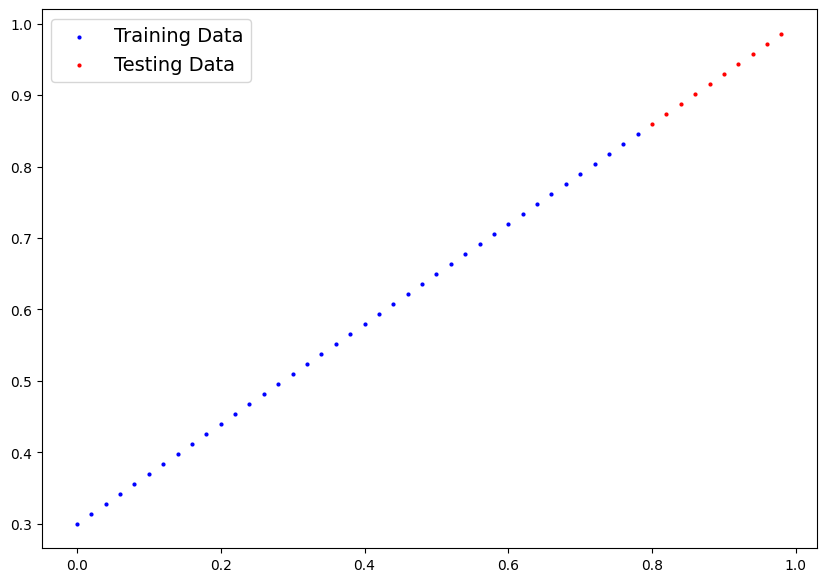

In [7]:
plot_prediction()

## 2.0 Building a Model

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does the algorithm do this?

It does it thriugh two algorithms:
1. Gradient Descent
2. Backpropagation

In [8]:
#Create Linear Regression Model Class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float32))
        
    #Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

## 2.1 Pytorch essential neural network building modules

* **torch.nn** -> contains all the building blocks for neural networks
* **torch.nn.Module** -> The base class for all neural network modules, all the building blocks for neural network are subclasses. If you are building a neural network in PyTorch, your models should subclass `nn.Module` requires a `forward()` method be implemented
* **torch.optim** -> contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss) 

## 2.2 Checking the contents of our PyTorch Model

We can check our model parameters or what is inside our model using `.parameters()`

In [9]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight, bias

(0.7, 0.3)

### 2.3 Making prediction using `torch.inference_mode()`

To check our model's predictive power, let us see how well it predicts `y_test` based on `x_test`

when we pass data through our model, it is going to run it through the `forward()` method.

In [12]:
print(f"Data We have: {X_test}")
print(f"Prediction we desire: {Y_test}")

Data We have: tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
Prediction we desire: tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In [13]:
# Making Prediction with the model
with torch.inference_mode():
    Y_preds = model_0(X_test)
Y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

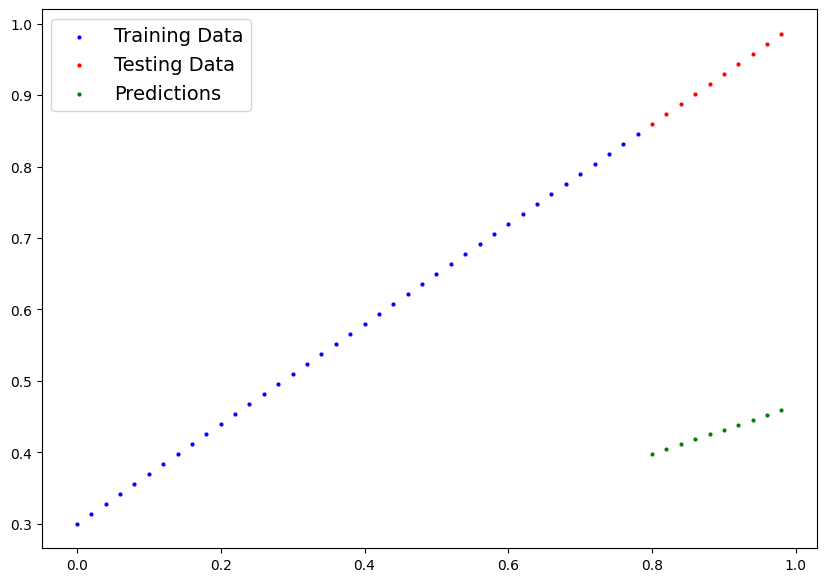

In [15]:
plot_prediction(predictions=Y_preds)

### 3.0 Training the Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note --> Loss function is also called cost function/criterion in different areas.

Things we need to Train:

1. **Loss Function:** A function to measure how wrong our model's predictions are to the ideal outputs

2. **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias) to improve the loss function.

    * Inside the optimizer you'll often have to set two parameters:

        * `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
        
        * `lr`(learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A Training Loop
* A Testing Loop

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### 3.1 Building a training loop (and a testing loop) in PyTorch

Things we need in a training loop:

0. Loop through the data and do the following within the loop

1. Forward Pass (this involves data moving through our model's `forward()` functions) to make predictions on data

2. Calculate the loss (compare forward pass predictions to ground truth labels)

3. Optimizer Zero Grad

4. Loss Backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)

5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**Gradient Descent**)

parameters are learned by the model from the data during training, while hyperparameters are external settings defined by the user before training begins

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

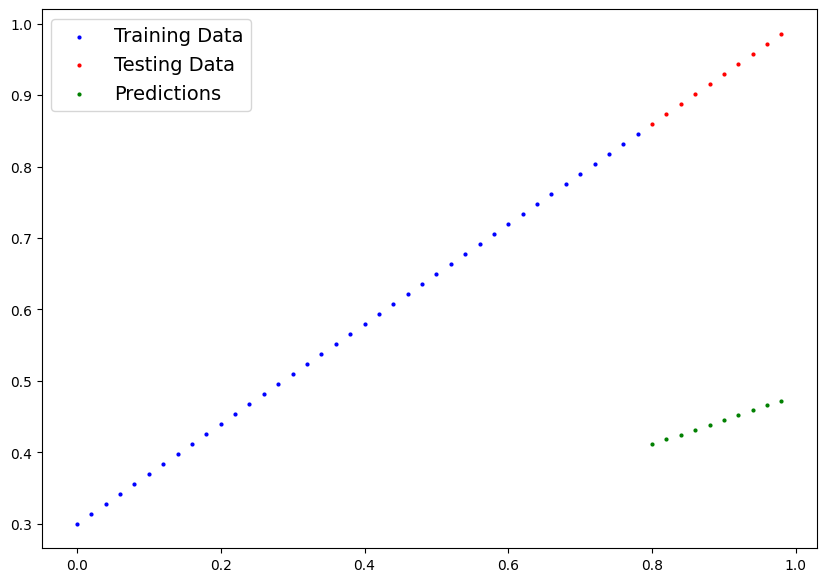

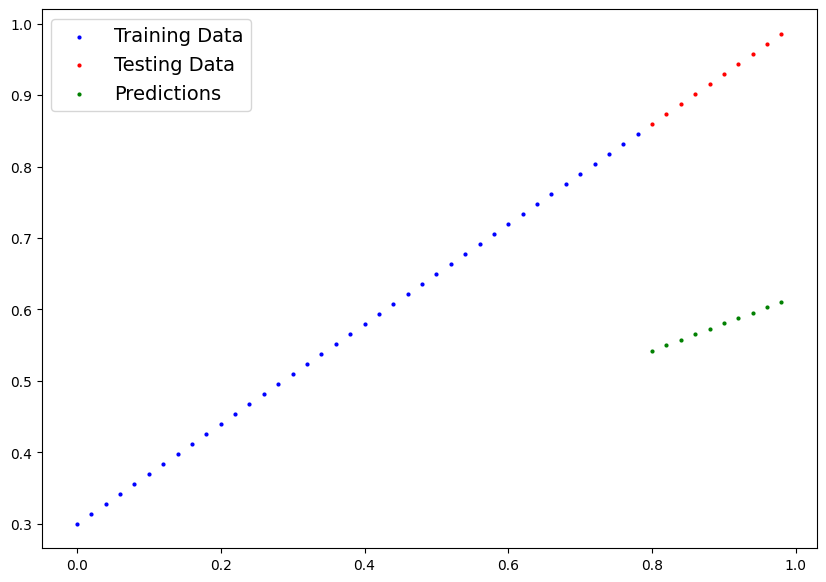

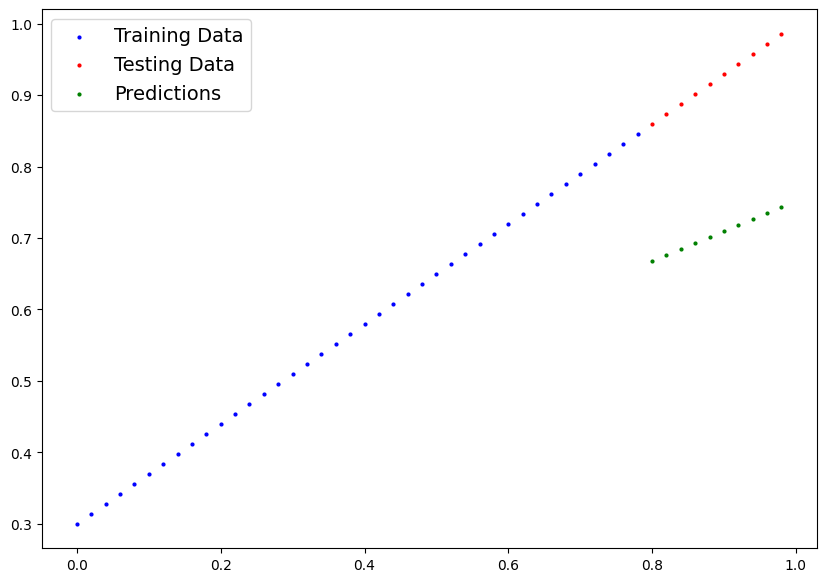

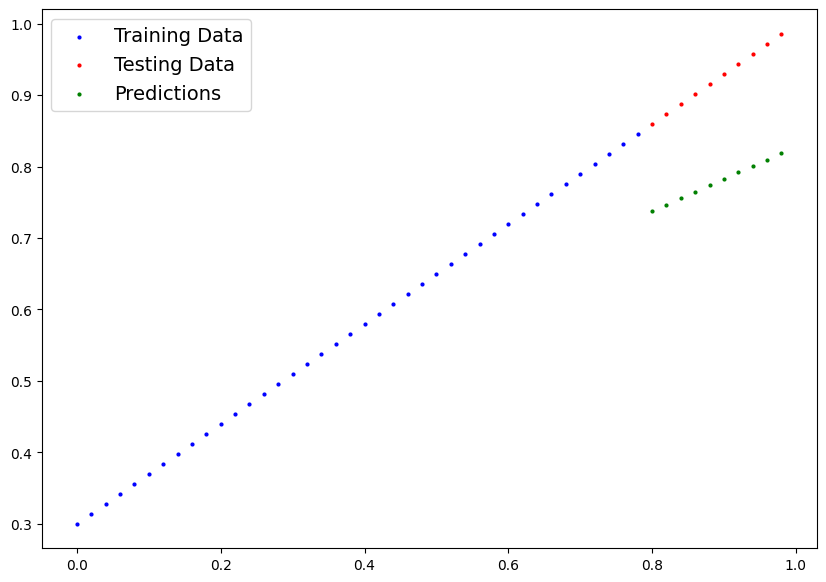

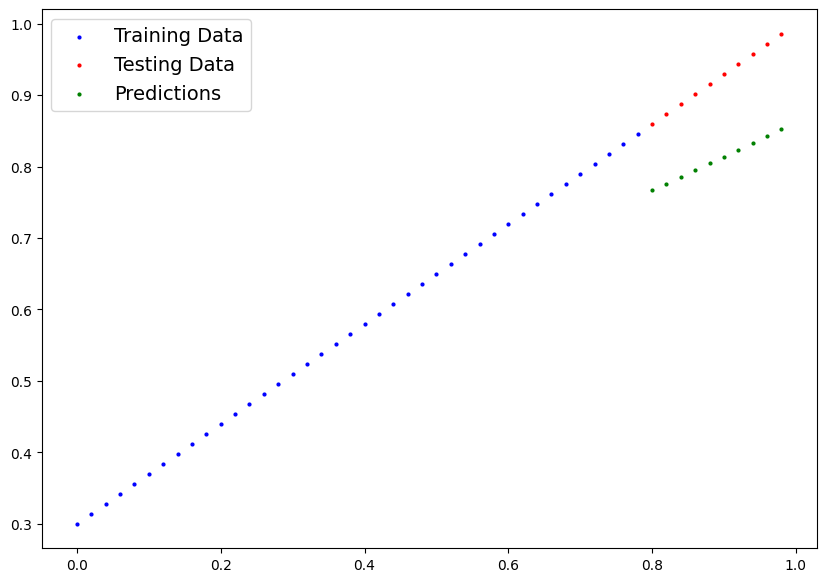

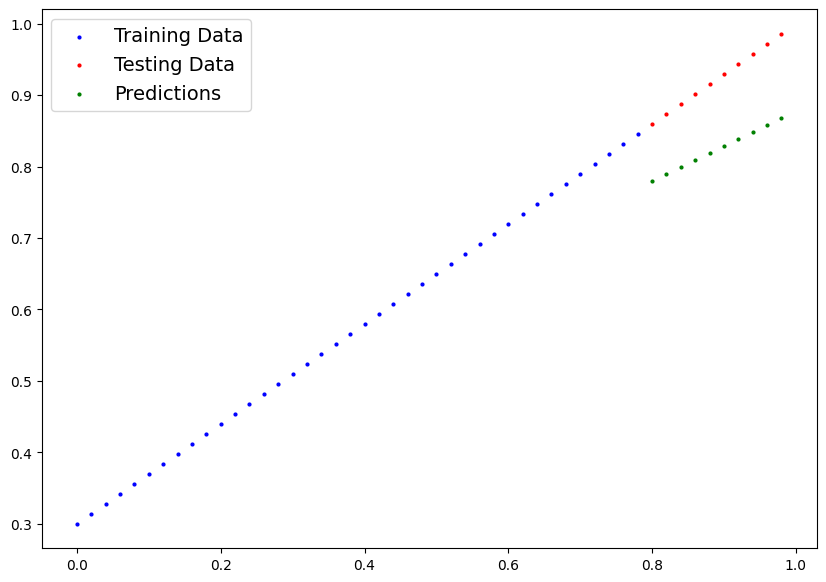

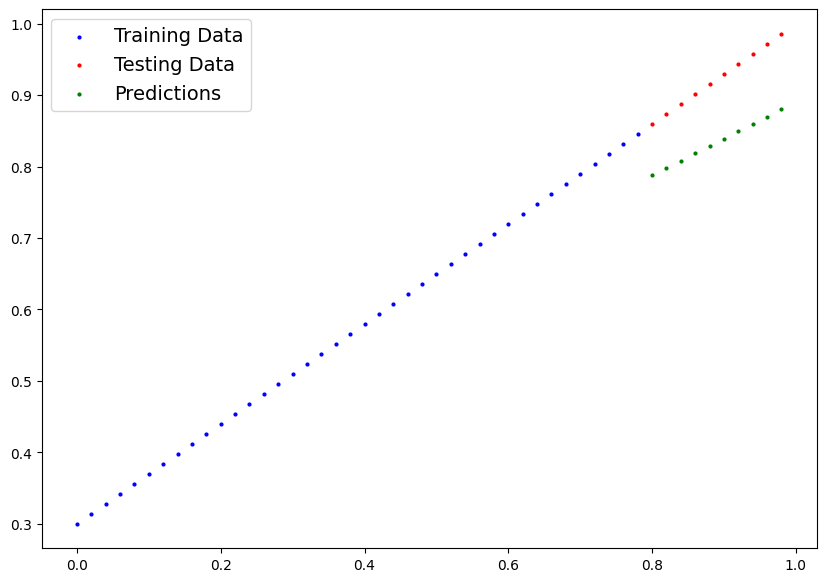

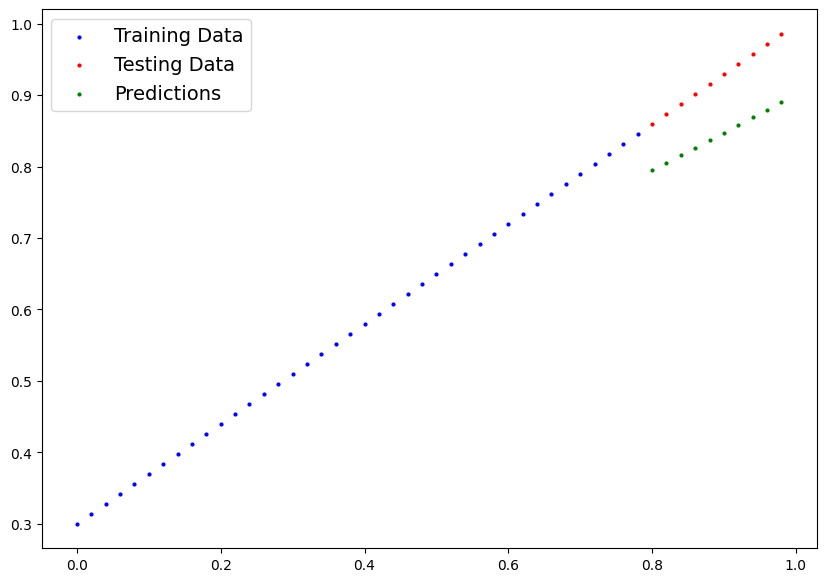

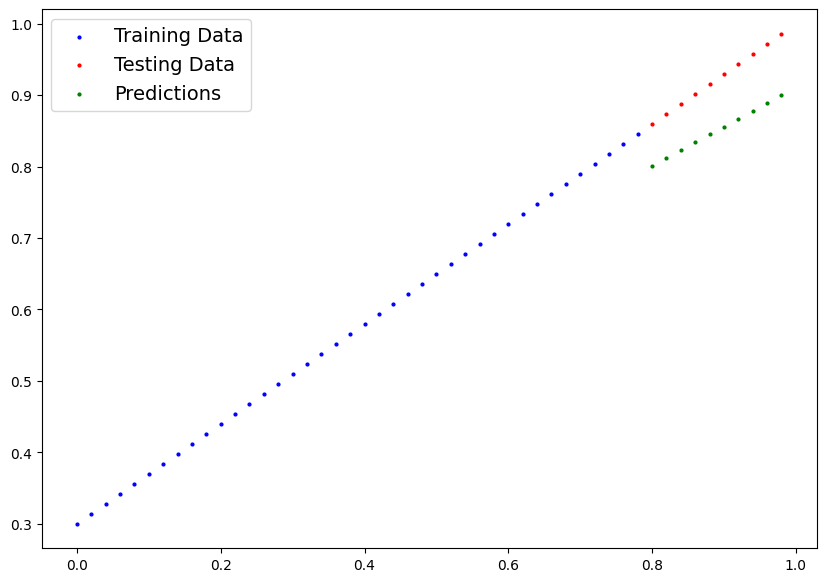

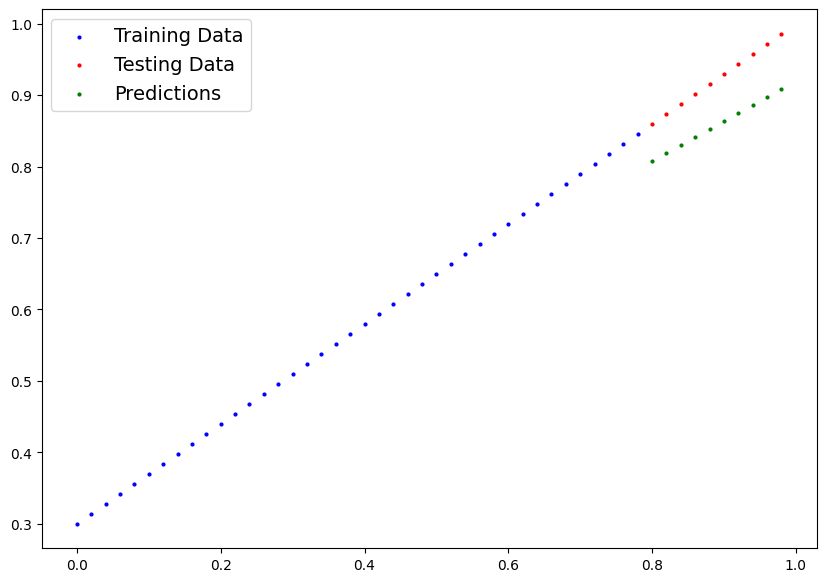

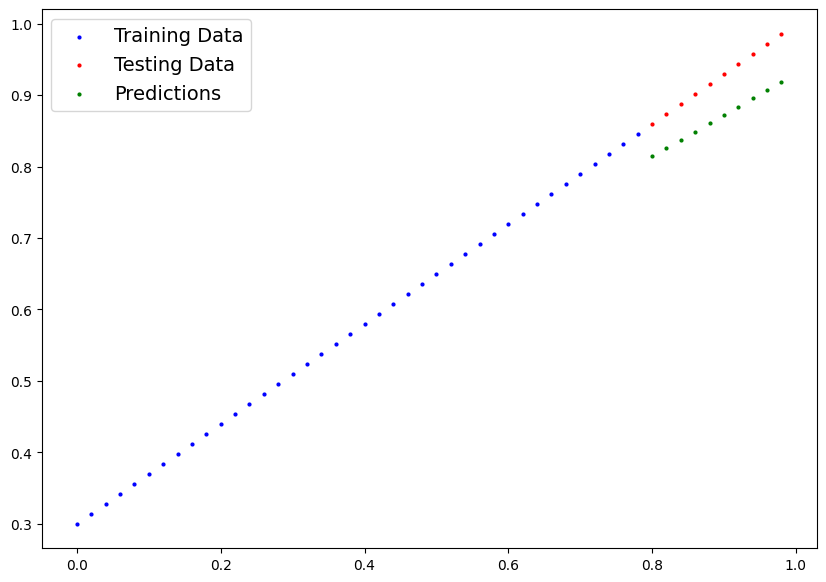

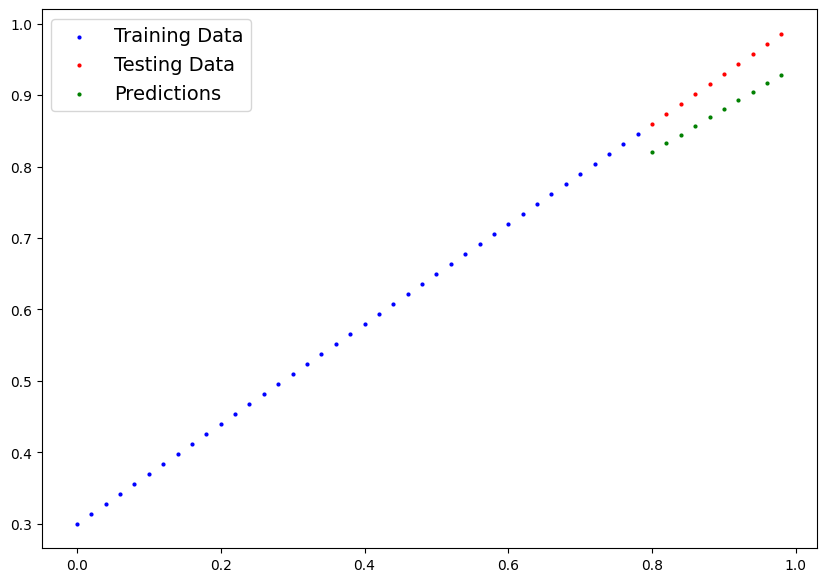

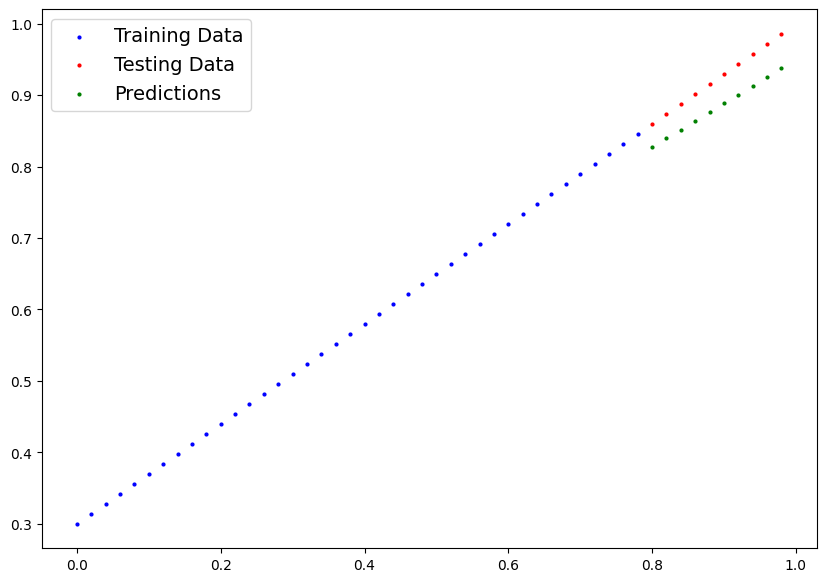

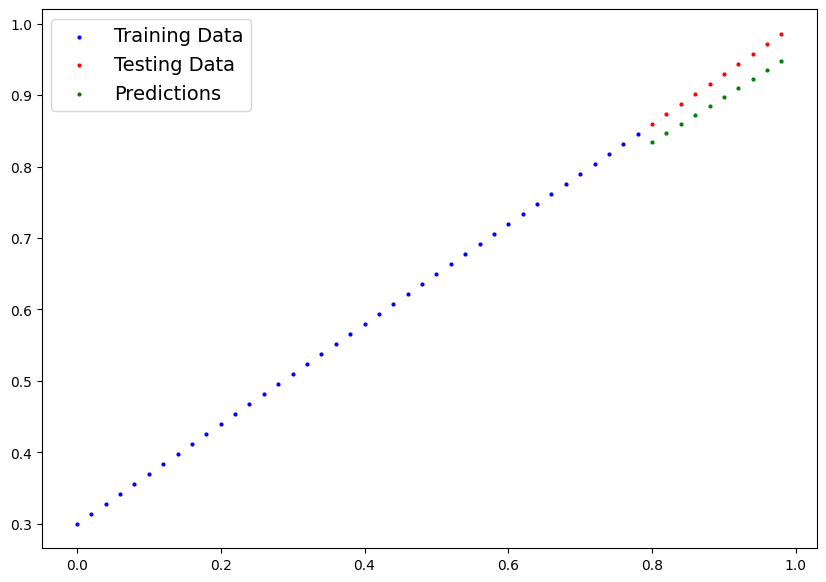

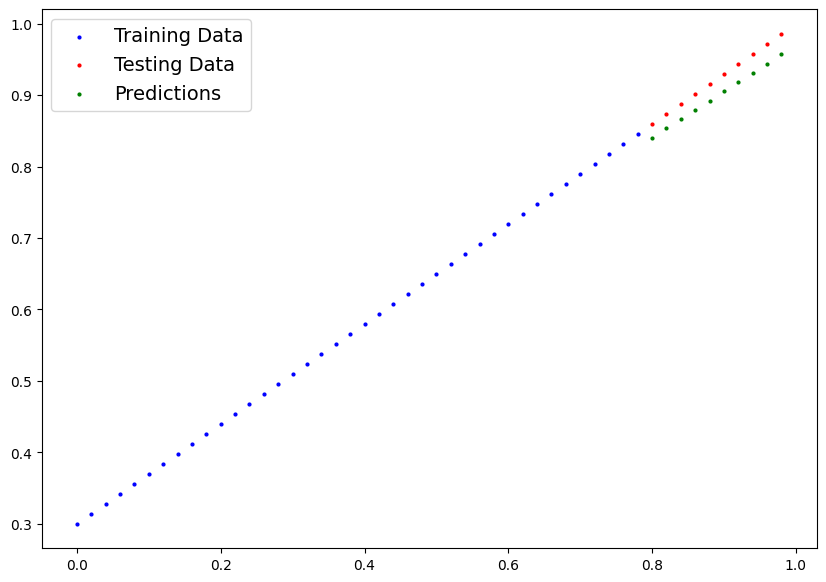

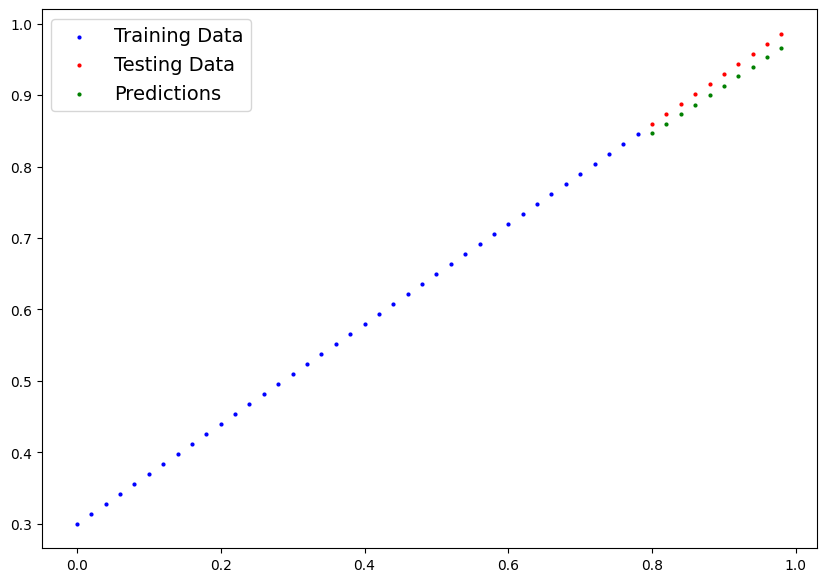

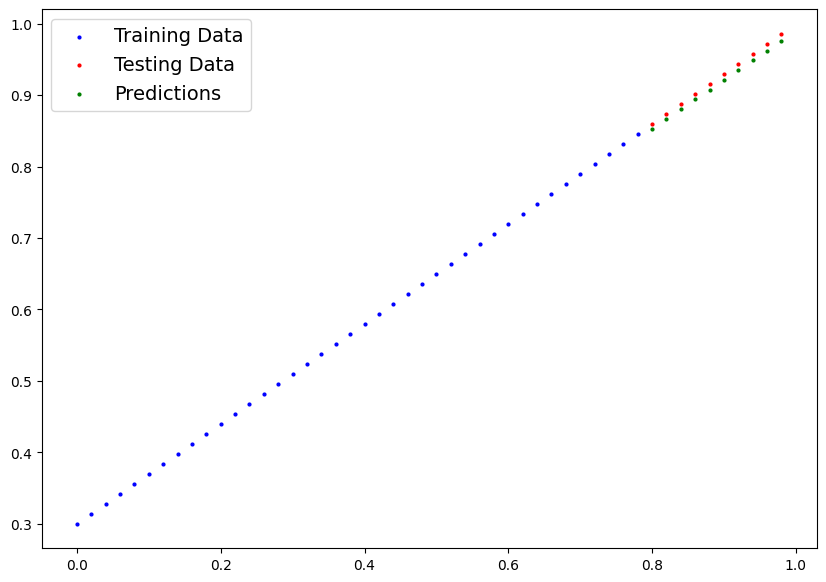

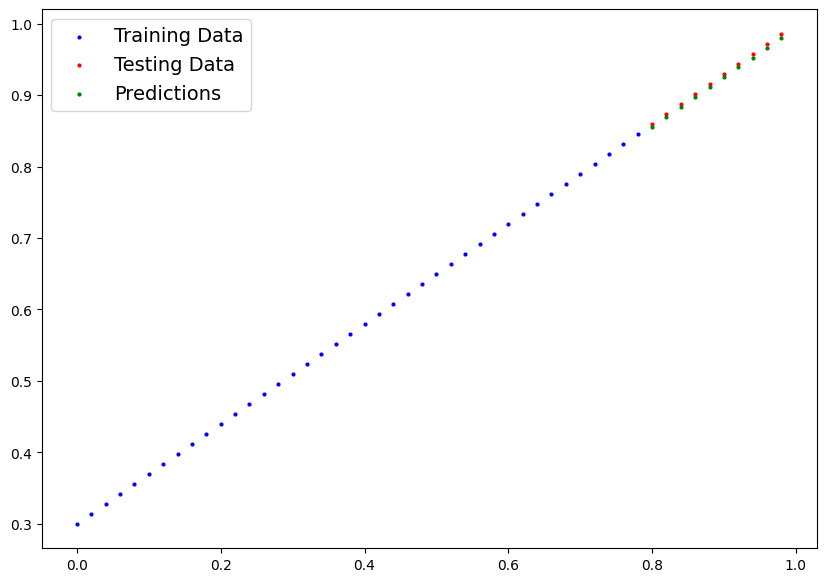

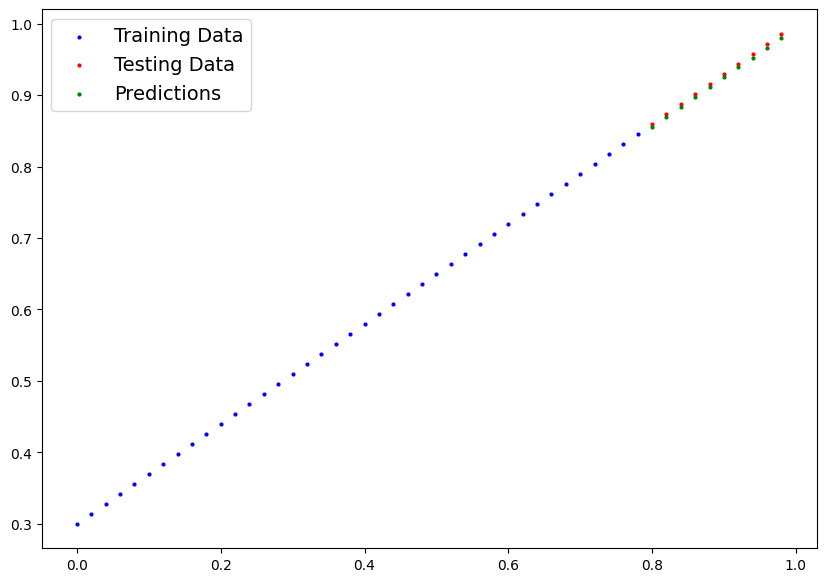

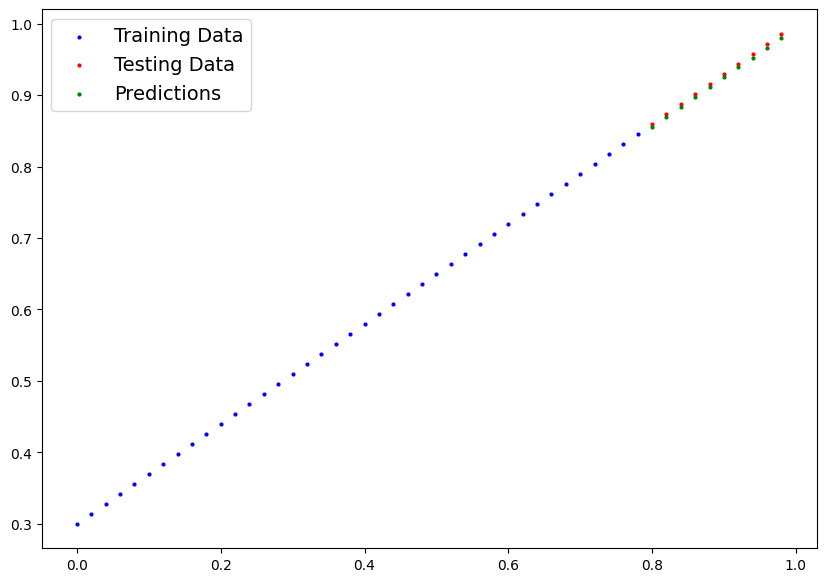

In [20]:
torch.manual_seed(42)

#Training
epoch_count = []
loss_values = []
test_loss_values = []

epochs = 200

for epoch in range(epochs):

    model_0.train()
    
    Y_pred = model_0(X_train)

    loss = loss_fn(Y_pred, Y_train)

    optimizer.zero_grad(set_to_none=True)

    loss.backward()

    optimizer.step()

    #Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing

    with torch.inference_mode(): # turns off gradient tracking and a couple of more things behind the scene
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        test_loss_fn = loss_fn(test_pred, Y_test)
    
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss_fn)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss_fn}")
        plot_prediction(predictions=test_pred)
        print(model_0.state_dict())

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [22]:
weight, bias

(0.7, 0.3)

In [23]:
with torch.inference_mode():
    Y_preds_new = model_0(X_test)

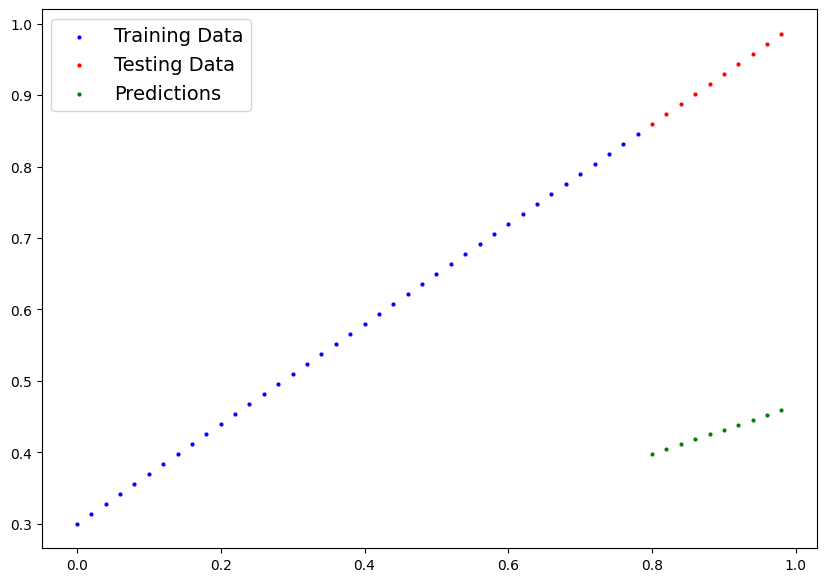

In [24]:
# Previous prediction of the untrained model
plot_prediction(predictions=Y_preds)

In [25]:
test_pred

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

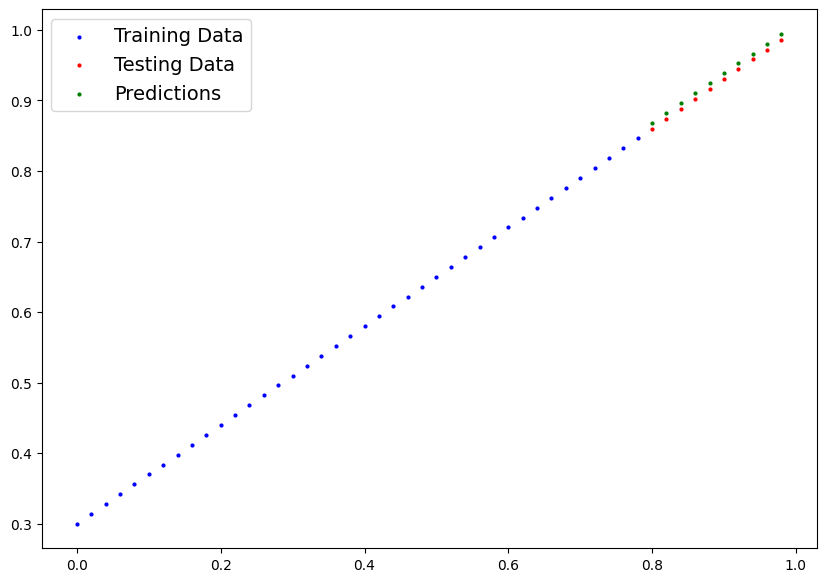

In [26]:
plot_prediction(predictions=test_pred)

### 4.0 Saving and Loading

There are three main methods for saving and loading models in our PyTorch:

1. `torch.save()` - allows us to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows us to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - This allows to load a model's saved state dictionary

### 4.1 Saving a Model in PyTorch



In [27]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "pytorch_workflow_002_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/pytorch_workflow_002_model_0.pth


### 4.2 Loading a PyTorch Model

Since we saved our model's  `state_dict()`  rather the entire model, we'll create a new instance of our model class and load the saved  `state_dict()`  into that.

In [28]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [29]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()
print(f"Model Results before loading the updated model: {loaded_model_0.state_dict()}")

# load the saved state_dict of model_0 (this update the new instance with the updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print(f"\nModel Results after loading the updated model: {loaded_model_0.state_dict()}")

Model Results before loading the updated model: OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Model Results after loading the updated model: OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [30]:
# Making predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [31]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [32]:
Y_preds_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [33]:
# Comparing the two models
Y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 5.0 Putting everything together

Going through all the steps above and seeing it all in one place.

In [34]:
# Importing PyTorch and Matpltolib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check Pytorch version
torch.__version__

'2.9.1+cu128'

# Writing devivce-agnostic code

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU

In [35]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Tensors on: {device}")

Tensors on: cuda


### 5.1 Data

In [36]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# create range values 
start = 0
end = 1
step = 0.02

# Create X and Y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) #without unsqueeze, errors will pop up
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [37]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

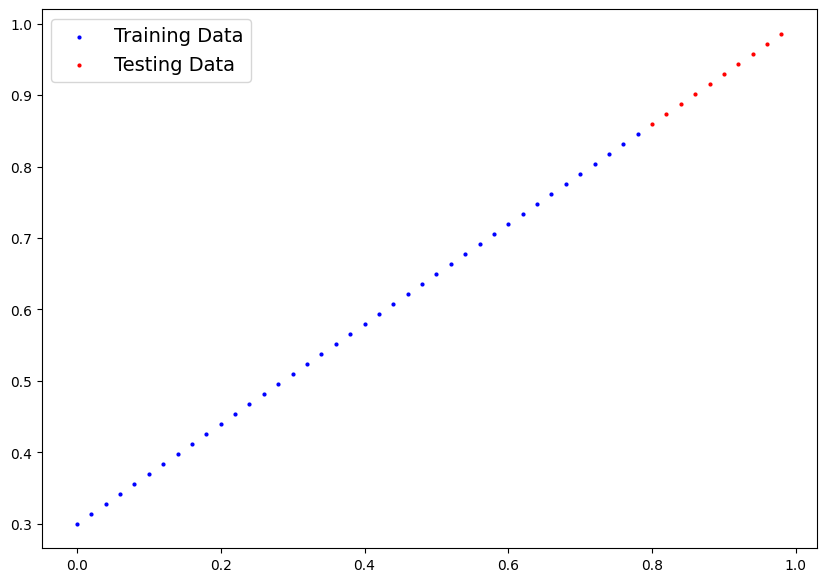

In [38]:
# plot the data
plot_prediction(X_train, y_train, X_test, y_test)

### 5.2 Building a PyTorch Linear Model


In [39]:
# Create a linear model by subclassing model class (Method I)

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float32))
        
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float32))
        
        def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.weights * x + self.bias

In [40]:
# II Method using nn.Linear()

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
# Set Manual Seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

### 5.2.1 Checking the performance of our model without training it, simply making predictions based on random parameters

In [41]:
with torch.inference_mode():
    y_preds_without_training_the_model = model_1(X_test)

y_preds_without_training_the_model

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])

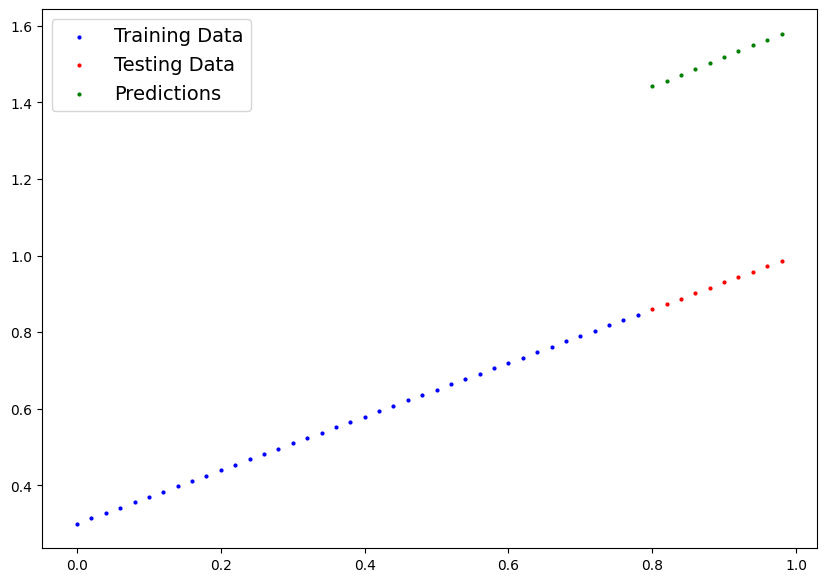

In [42]:
plot_prediction(predictions=y_preds_without_training_the_model)

### 5.3 Training and Testing our Linear Model

* **Training:**   `1) model.train() (Putting Data on training loop) -> 2) Forward Prop -> 3) Calculate Loss -> 4) zero grad (optimizer.zero_grad()) -> 5) Backpropagation (loss.backward()) -> 6) step (Gradient Descent) (optimizer.step())`

* **Testing:**   `1) model.eval() (necessary so that our model stops gradient tracking, that saves compute) -> 2) file manager (torch.inference_mode()) -> 3) Forward Prop -> 4) Test loss -> 5) Printing the required data`

### 5.3.1 Check the model current device


In [43]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [44]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [45]:
print(f"Current Model Parameters Prior to the training: {model_1.state_dict()}")

Current Model Parameters Prior to the training: OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')), ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])


### 5.3.2 Training

For training we need:
* Loss Function
* Optimizer
* Training Loop
* Testing Loop

Setting up Loss Function and Optimizer

In [46]:
# Set up Loss Function
loss_fn = nn.L1Loss()

# Set up optimizer 
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

Training Loop

In [47]:
#Training
torch.manual_seed(42)

epochs = 200

# Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    Y_preds_on_model_1 = model_1(X_train)

    loss = loss_fn(Y_preds_on_model_1, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    #Testing
    model_1.eval()
    with torch.inference_mode():
        test_preds = model_1(X_test)

        test_loss = loss_fn(test_preds, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416

In [48]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [49]:
weight, bias

(0.7, 0.3)

### 5.4 Making and evaluating predictions

In [50]:
with torch.inference_mode():
    testing = model_1(X_test)
testing

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

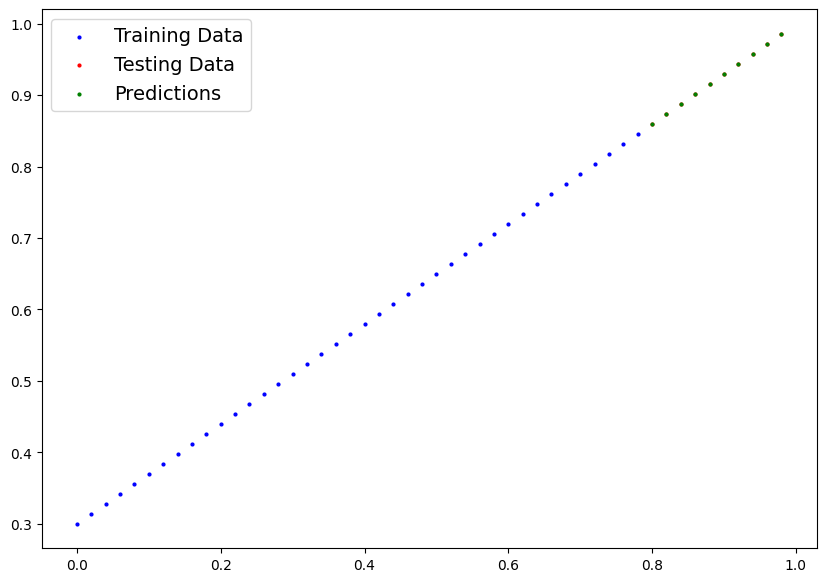

In [51]:
plot_prediction(predictions=testing.cpu())

### 5.5 Saving and Loading the model

5.5.1 Saving

In [52]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "pytorch_workflow_002_model_1.pth"
MODEL_SAVE_PATH_1 = MODEL_PATH / MODEL_NAME

print(f"Saving the model to: {MODEL_SAVE_PATH_1}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH_1)

Saving the model to: models/pytorch_workflow_002_model_1.pth


5.5.2 Loading

In [53]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_1 = LinearRegressionModelV2()
print(f"Model Results before loading the updated model: {loaded_model_1.state_dict()}")

# load the saved state_dict of model_0 (this update the new instance with the updated parameters)
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH_1))
loaded_model_1.to(device)
print(f"\nModel Results after loading the updated model: {loaded_model_1.state_dict()}")

Model Results before loading the updated model: OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])

Model Results after loading the updated model: OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')), ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])


In [54]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [55]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

testing == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

### Section 002 Exercises

In [56]:
import torch
from torch import nn
import matplotlib.pyplot as plt

Device Agnostid code for the entirety

In [57]:
device = "cuda" if torch.cuda.is_available() else "cpu"

### Q1: Data

In [58]:
# Q1.1: Creating a Dataset using Linear Regression Formula
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
print(f"Shape of the dataset is: {X.shape}\nlength of the dataset: {len(X)}")

y = X * weight + bias

# Q1.2: Data Split into 80-20 Train-Test Ratio respectively
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(len(X_train), len(y_train), len(X_test),len(y_test))



Shape of the dataset is: torch.Size([100, 1])
length of the dataset: 100
80 80 20 20


In [59]:
def visual_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

    plt.scatter(test_data, test_labels, c="r", s=4, label="Testing Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

    plt.legend(prop={"size": 14})

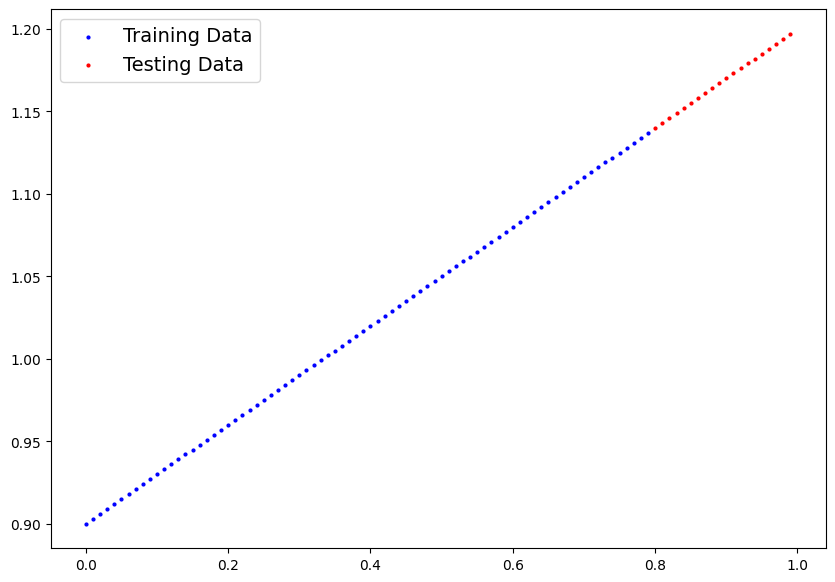

In [60]:
visual_prediction(X_train, y_train, X_test, y_test)

### Q2: Model

### **Note:**  *Use only one of the methods, do not mix both*

In [61]:
# Q2: Building a PyTorch Linear Model
# 2.1 Using the `nn.Parameter()` method
"""class LinearRegressionModelPracticeV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                                dtype=torch.float32,
                                                requires_grad=True))
        
        self.bias = nn.Parameter(torch.randn(1,
                                             dtype=torch.float32,
                                             requires_grad=True))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

torch.manual_seed(42)    
model_practice_1 = LinearRegressionModelPracticeV1()
model_practice_1.state_dict()"""

'class LinearRegressionModelPracticeV1(nn.Module):\n    def __init__(self):\n        super().__init__()\n        self.weight = nn.Parameter(torch.randn(1,\n                                                dtype=torch.float32,\n                                                requires_grad=True))\n\n        self.bias = nn.Parameter(torch.randn(1,\n                                             dtype=torch.float32,\n                                             requires_grad=True))\n\n    def forward(self, x: torch.Tensor) -> torch.Tensor:\n        return self.weight * x + self.bias\n\ntorch.manual_seed(42)    \nmodel_practice_1 = LinearRegressionModelPracticeV1()\nmodel_practice_1.state_dict()'

In [62]:
# 2.2 Using the `nn.Linear()` Linear Layer
class LinearRegressionModelPracticeV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_practice_2 = LinearRegressionModelPracticeV2()
model_practice_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

Checking predictions on untrained model

In [63]:
with torch.inference_mode():
    z = model_practice_2(y_test)
z

tensor([[1.7016],
        [1.7039],
        [1.7062],
        [1.7085],
        [1.7108],
        [1.7130],
        [1.7153],
        [1.7176],
        [1.7199],
        [1.7222],
        [1.7245],
        [1.7268],
        [1.7291],
        [1.7314],
        [1.7337],
        [1.7360],
        [1.7383],
        [1.7406],
        [1.7429],
        [1.7452]])

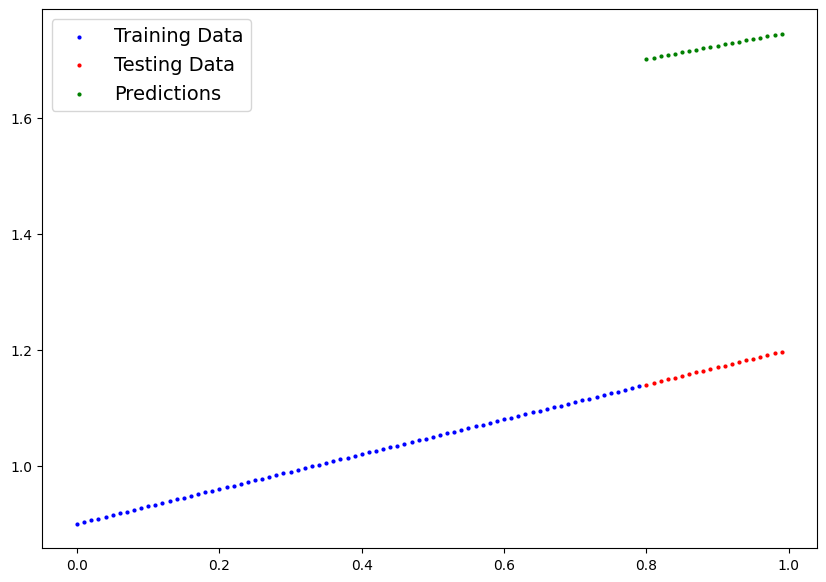

In [64]:
visual_prediction(predictions=z)

### Q3: Training

In [65]:
# Q3.1 Setting up Loss function and optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_practice_2.parameters(),
                        lr=0.01)

In [66]:
model_practice_2.to(device)
next(model_practice_2.parameters()).device

device(type='cuda', index=0)

Epochs: 0 | Training Loss: 0.1275613158941269 | Test Loss: 0.33650314807891846
Epochs: 20 | Training Loss: 0.08187223970890045 | Test Loss: 0.21840262413024902
Epochs: 40 | Training Loss: 0.07207288593053818 | Test Loss: 0.17458660900592804
Epochs: 60 | Training Loss: 0.06507988274097443 | Test Loss: 0.15310420095920563
Epochs: 80 | Training Loss: 0.05822876840829849 | Test Loss: 0.1367770880460739
Epochs: 100 | Training Loss: 0.05137667804956436 | Test Loss: 0.12079393863677979
Epochs: 120 | Training Loss: 0.04452557489275932 | Test Loss: 0.10446684807538986
Epochs: 140 | Training Loss: 0.0376744270324707 | Test Loss: 0.08813951909542084
Epochs: 160 | Training Loss: 0.03082224726676941 | Test Loss: 0.0721558928489685
Epochs: 180 | Training Loss: 0.02397105097770691 | Test Loss: 0.055828340351581573
Epochs: 200 | Training Loss: 0.017119847238063812 | Test Loss: 0.03950077295303345
Epochs: 220 | Training Loss: 0.010267681442201138 | Test Loss: 0.02351718582212925
Epochs: 240 | Training 

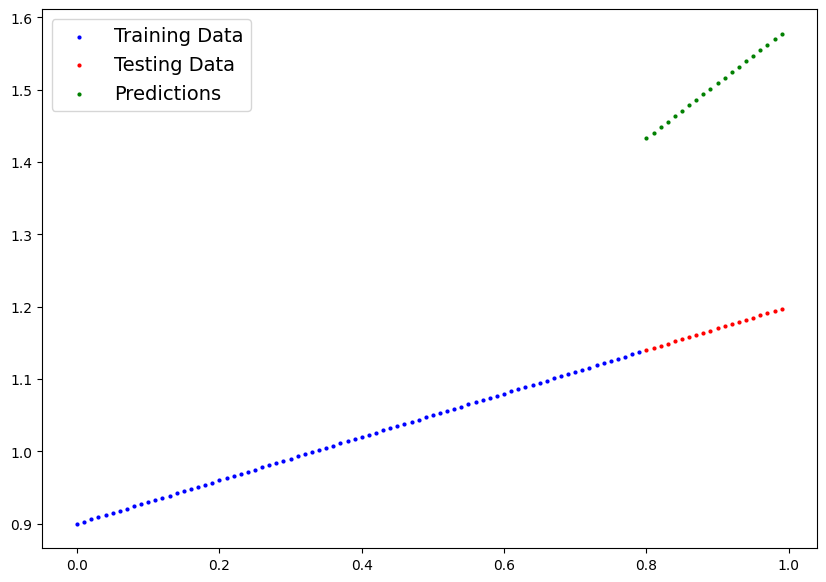

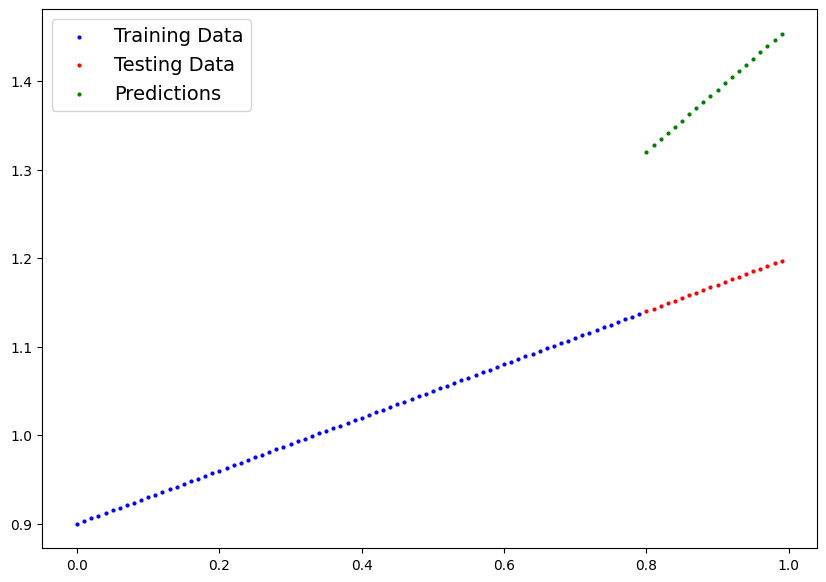

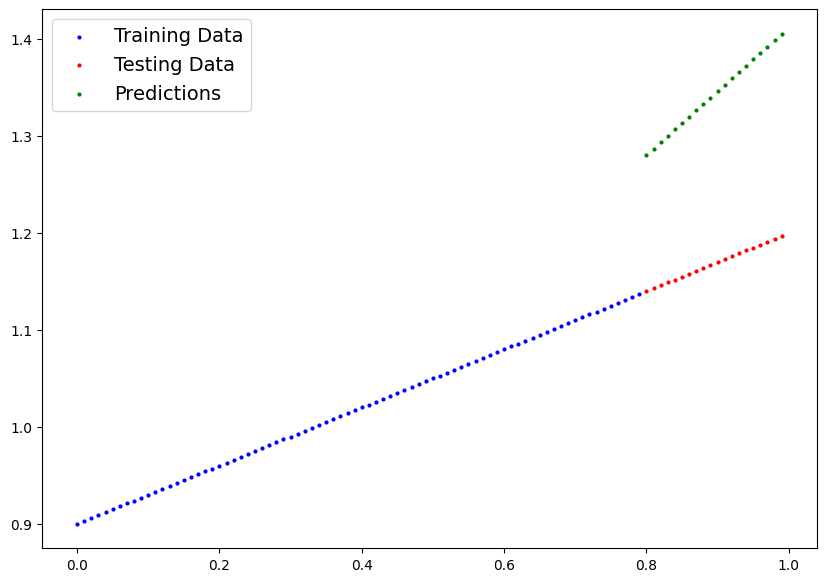

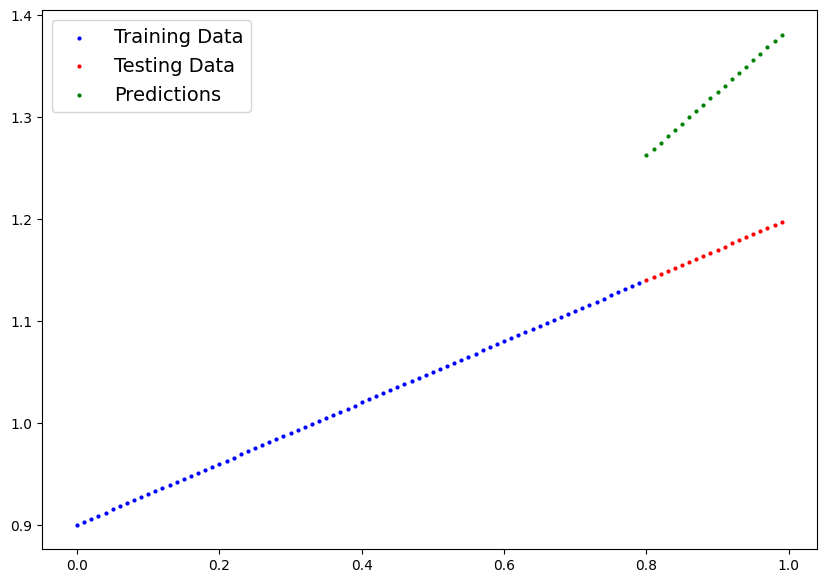

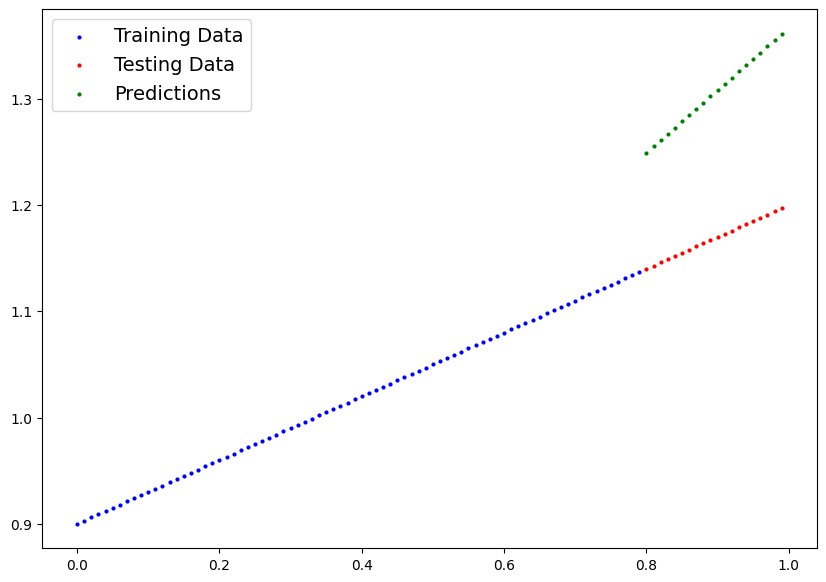

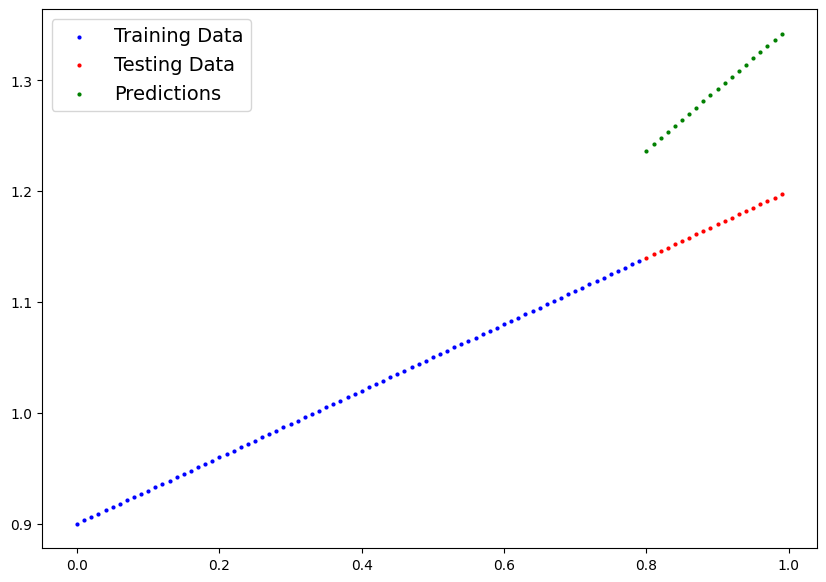

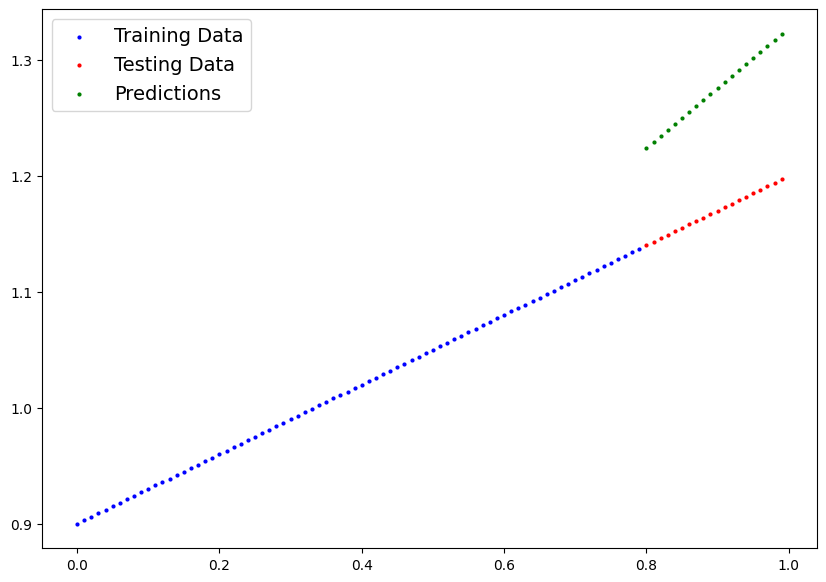

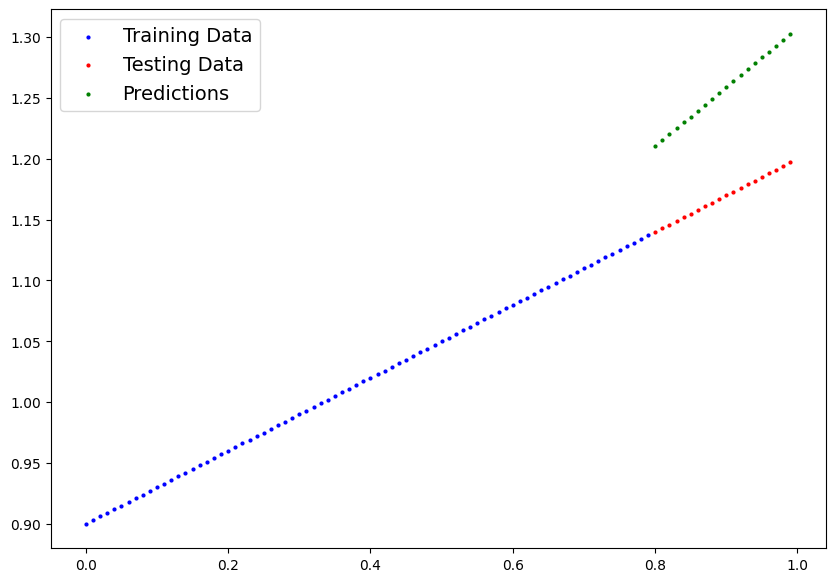

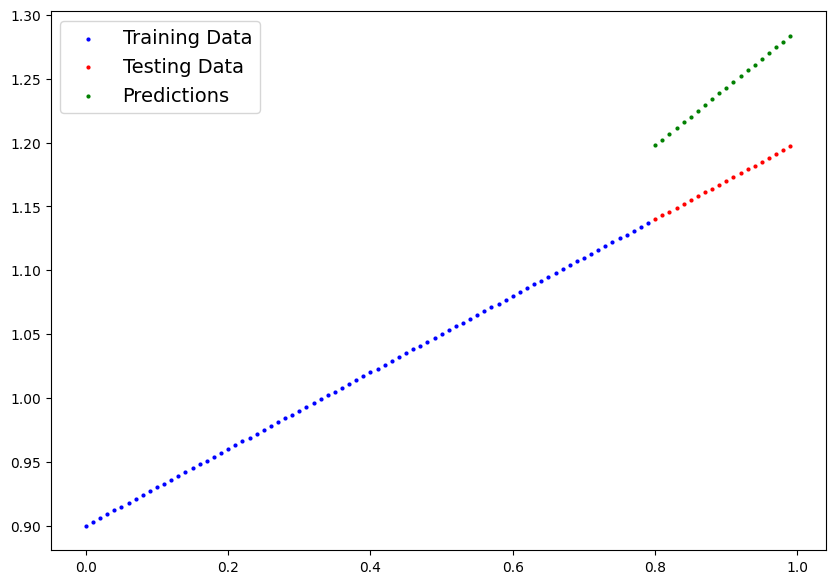

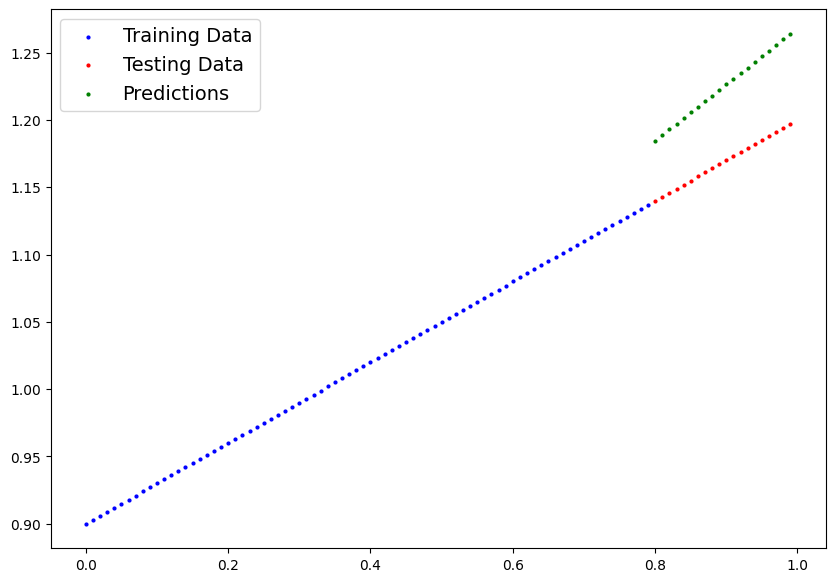

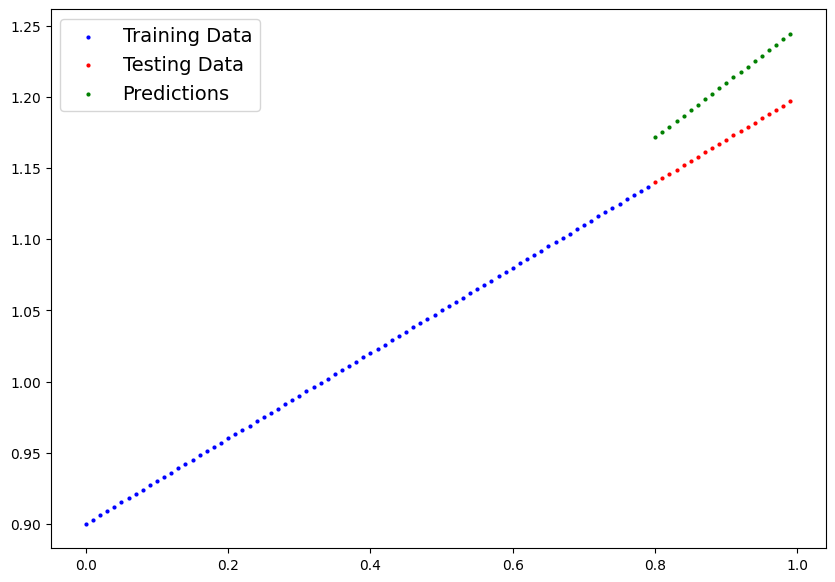

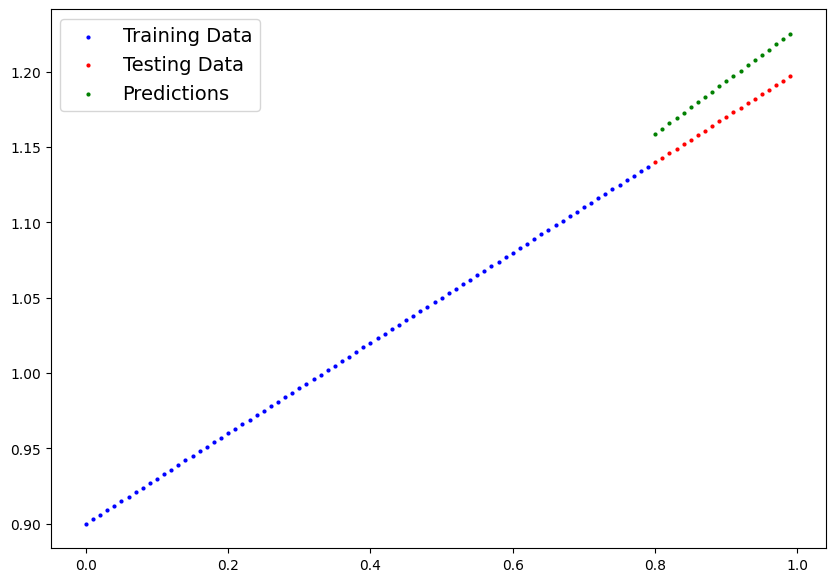

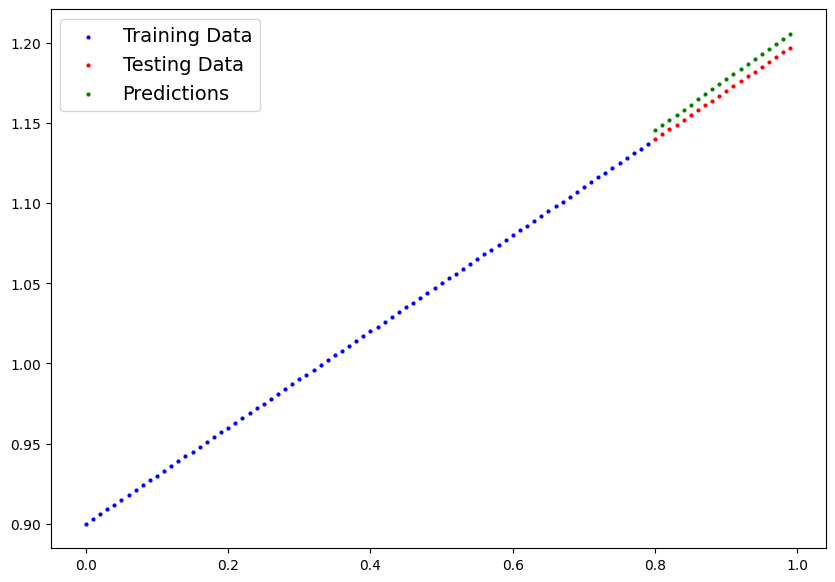

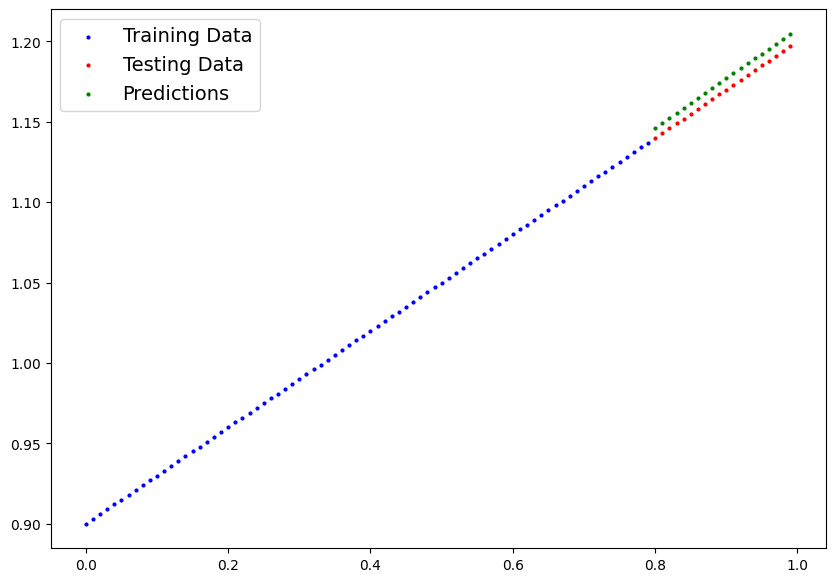

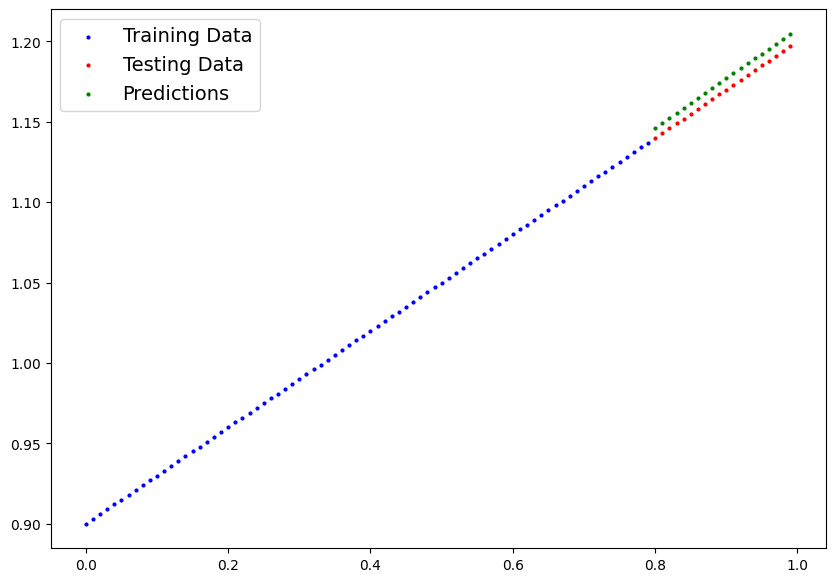

In [67]:
# Q3.2 Training and Testing Loop
torch.manual_seed(42)
epochs = 300

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_practice_2.train()
    practice_preds = model_practice_2(X_train)

    loss = loss_fn(practice_preds, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_practice_2.eval()
    with torch.inference_mode():
        practice_test_preds = model_practice_2(X_test)

        test_loss = loss_fn(practice_test_preds, y_test)

    if epoch % 20 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        visual_prediction(predictions=practice_test_preds.cpu())
        print(f"Epochs: {epoch} | Training Loss: {loss} | Test Loss: {test_loss}")

### Q4: Inferencing

In [77]:
with torch.inference_mode():
    y_predictions = model_practice_2(X_test)
y_predictions

tensor([[1.1333],
        [1.1363],
        [1.1393],
        [1.1423],
        [1.1454],
        [1.1484],
        [1.1514],
        [1.1545],
        [1.1575],
        [1.1605],
        [1.1635],
        [1.1666],
        [1.1696],
        [1.1726],
        [1.1757],
        [1.1787],
        [1.1817],
        [1.1847],
        [1.1878],
        [1.1908]], device='cuda:0')

In [78]:
print(f"y_test: {y_test.size()}")
print(f"y_predictions: {y_predictions.shape}")

y_test: torch.Size([20, 1])
y_predictions: torch.Size([20, 1])


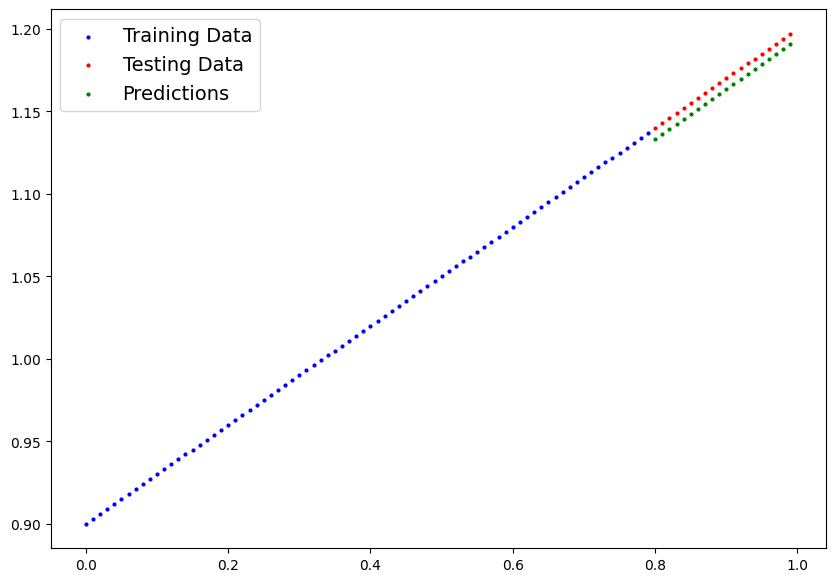

In [79]:
visual_prediction(predictions=y_predictions.cpu())

### Q5: Save And Load

In [80]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "pytorch_workflow_002_model_practice.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_practice_2.state_dict(),
           f=MODEL_SAVE_PATH)

In [81]:
loaded_model_2 = LinearRegressionModelPracticeV2()

loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_2.to(device)

LinearRegressionModelPracticeV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [86]:
print(f"Loaded Model: {loaded_model_2.state_dict()}")
print(f"Orignal Trained Model: {model_practice_2.state_dict()}")
print(f"Original Weight: {weight} | Original Bias: {bias}")

Loaded Model: OrderedDict([('linear_layer.weight', tensor([[0.3028]], device='cuda:0')), ('linear_layer.bias', tensor([0.8910], device='cuda:0'))])
Orignal Trained Model: OrderedDict([('linear_layer.weight', tensor([[0.3028]], device='cuda:0')), ('linear_layer.bias', tensor([0.8910], device='cuda:0'))])
Original Weight: 0.3 | Original Bias: 0.9


In [84]:
loaded_model_2.eval()
with torch.inference_mode():
    y_predictions_loaded = loaded_model_2(X_test)

y_predictions_loaded == y_predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

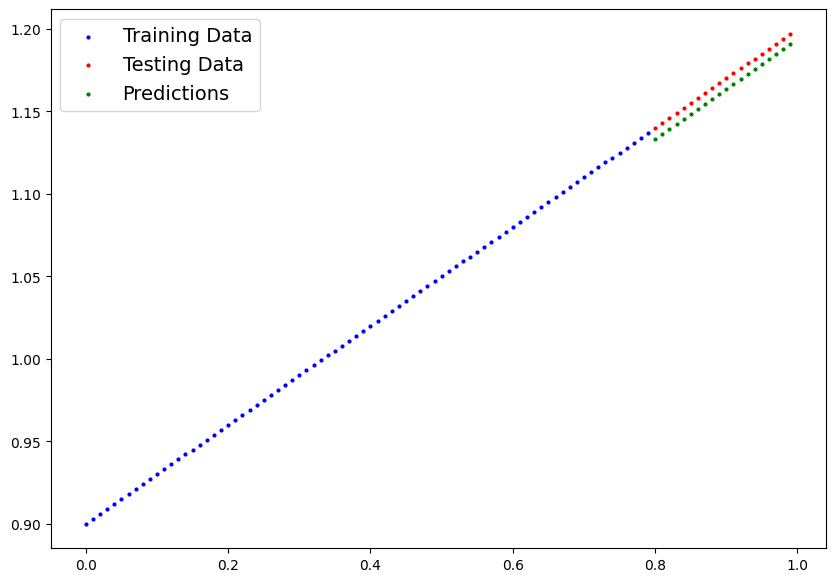

In [85]:
visual_prediction(predictions=y_predictions_loaded.cpu())

In [76]:
y_predictions

tensor([[1.2362],
        [1.2371],
        [1.2380],
        [1.2389],
        [1.2399],
        [1.2408],
        [1.2417],
        [1.2426],
        [1.2435],
        [1.2444],
        [1.2453],
        [1.2462],
        [1.2471],
        [1.2480],
        [1.2489],
        [1.2498],
        [1.2508],
        [1.2517],
        [1.2526],
        [1.2535]], device='cuda:0')